# Ad classification

In [1]:
import pandas as pd
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import sklearn as sk
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing  


# Data manipulation

## 1. Open CSV File


### 1.1 Geting columns names
This dataset from [Internet Advertisement](https://archive-beta.ics.uci.edu/dataset/51/internet+advertisements) containingn 1557 columns so in order to get the names we read them from their own csv after cleaning the original ad.names

In [2]:
names = pd.read_csv("./csv/ad2.names", delimiter=":", header=None)
names.columns =  ["0", "1"]

In [3]:
names

,0,1
0,height,continuous.
1,width,continuous.
2,aratio,continuous.
3,local,"0,1."
4,url*images+buttons,"0,1."
...,...,...
1554,caption*here,"0,1."
1555,caption*click,"0,1."
1556,caption*for,"0,1."
1557,caption*you,"0,1."


In [4]:
names["0"]

0                   height
1                    width
2                   aratio
3                    local
4       url*images+buttons
               ...        
1554          caption*here
1555         caption*click
1556           caption*for
1557           caption*you
1558             adsResult
Name: 0, Length: 1559, dtype: object

## 1.2 Open dataframe file

### Get dype dict
Specify the type in the columns

In [5]:
dtypes = {x : float  for x in names["0"] }

In [6]:
dtypes['adsResult'] = "string"

In [7]:
# The original file contains '?' when there is no data so we use the parameter na_values to specify that
# We create a dtype dictionary to tell pd how to interpretate the values
file_path = "./csv/ad.data"
ads = pd.read_csv(file_path, dtype = dtypes, na_values = '?', delimiter=",",  header=None)
ads.columns = names["0"]

C:\Users\alexc\AppData\Local\Temp/ipykernel_58896/2238722420.py:4: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  ads = pd.read_csv(file_path, dtype = dtypes, na_values = '?', delimiter=",",  header=None)


## 1.3 Analize dataframe

In [8]:
ads

0,height,width,aratio,local,url*images+buttons,url*likesbooks.com,url*www.slake.com,url*hydrogeologist,url*oso,url*media,...,caption*home,caption*my,caption*your,caption*in,caption*bytes,caption*here,caption*click,caption*for,caption*you,adsResult
0,125.0,125.0,1.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,57.0,468.0,8.2105,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,33.0,230.0,6.9696,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60.0,468.0,7.8,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,60.0,468.0,7.8,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3274,170.0,94.0,0.5529,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
3275,101.0,140.0,1.3861,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
3276,23.0,120.0,5.2173,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
3277,NaN,NaN,NaN,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.


In [9]:
ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3279 entries, 0 to 3278
Columns: 1559 entries, height to adsResult
dtypes: float64(3), int64(1554), object(2)
memory usage: 39.0+ MB


In [10]:
ads['adsResult'].unique()

array(['ad.', 'nonad.'], dtype=object)

In [11]:
ads.head()

0,height,width,aratio,local,url*images+buttons,url*likesbooks.com,url*www.slake.com,url*hydrogeologist,url*oso,url*media,...,caption*home,caption*my,caption*your,caption*in,caption*bytes,caption*here,caption*click,caption*for,caption*you,adsResult
0,125.0,125.0,1.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,57.0,468.0,8.2105,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,33.0,230.0,6.9696,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60.0,468.0,7.8,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,60.0,468.0,7.8,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.


In [12]:
ads.columns

Index(['height', 'width', 'aratio', 'local', 'url*images+buttons',
       'url*likesbooks.com', 'url*www.slake.com', 'url*hydrogeologist',
       'url*oso', 'url*media',
       ...
       'caption*home', 'caption*my', 'caption*your', 'caption*in',
       'caption*bytes', 'caption*here', 'caption*click', 'caption*for',
       'caption*you', 'adsResult'],
      dtype='object', name='0', length=1559)

In [13]:
ads.shape

(3279, 1559)

In [14]:
ads.describe()

0,height,width,local,url*images+buttons,url*likesbooks.com,url*www.slake.com,url*hydrogeologist,url*oso,url*media,url*peace+images,...,caption*of,caption*home,caption*my,caption*your,caption*in,caption*bytes,caption*here,caption*click,caption*for,caption*you
count,2376.000000,2378.000000,3264.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,...,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000
mean,64.021886,155.344828,0.767157,0.004270,0.011589,0.004575,0.003355,0.003965,0.011589,0.003355,...,0.006099,0.004575,0.003660,0.002440,0.003050,0.006404,0.012809,0.013419,0.009759,0.001525
std,54.868604,130.032350,0.422708,0.065212,0.107042,0.067491,0.057831,0.062850,0.107042,0.057831,...,0.077872,0.067491,0.060393,0.049341,0.055148,0.079783,0.112466,0.115077,0.098320,0.039026
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,80.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,51.000000,110.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,85.250000,184.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,640.000000,640.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 2. Clean Data and Encoding

### 2.1 Cleaning NaN Values

In [15]:
ads.isnull().any()

0
height                 True
width                  True
aratio                 True
local                  True
url*images+buttons    False
                      ...  
caption*here          False
caption*click         False
caption*for           False
caption*you           False
adsResult             False
Length: 1559, dtype: bool

In [16]:
ads.shape

(3279, 1559)

In [17]:
ads = ads.dropna()

Now we get the diference before and after droping the Nan cels

In [18]:
ads.shape

(2359, 1559)

Correct the specific columns with the proper type 

In [19]:
ads['aratio'].isnull().any()

False

In [20]:
ads['aratio'].apply(float)

0       1.0000
1       8.2105
2       6.9696
3       7.8000
4       7.8000
         ...  
3273    1.0000
3274    0.5529
3275    1.3861
3276    5.2173
3278    1.0000
Name: aratio, Length: 2359, dtype: float64

In [21]:
ads['aratio'].dtypes

dtype('O')

In [22]:
ads['url*likesbooks.com'].apply(float)

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
3273    0.0
3274    0.0
3275    0.0
3276    0.0
3278    0.0
Name: url*likesbooks.com, Length: 2359, dtype: float64

### 2.2 Encoding
Transform the clasification variable to numeric values

In [23]:
le = preprocessing.LabelEncoder()
df = ads.copy()

In [24]:
df[ads.columns[-1]] = le.fit_transform(ads[ads.columns[-1]])

In [25]:
# Here we can se the last column has change its values to numbers in range of 0-1
df

0,height,width,aratio,local,url*images+buttons,url*likesbooks.com,url*www.slake.com,url*hydrogeologist,url*oso,url*media,...,caption*home,caption*my,caption*your,caption*in,caption*bytes,caption*here,caption*click,caption*for,caption*you,adsResult
0,125.0,125.0,1.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,57.0,468.0,8.2105,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,33.0,230.0,6.9696,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,60.0,468.0,7.8,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,60.0,468.0,7.8,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3273,30.0,30.0,1.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3274,170.0,94.0,0.5529,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3275,101.0,140.0,1.3861,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3276,23.0,120.0,5.2173,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### 2.3 Get X and Y variable

In [26]:
# Get all columns minus the classification value
# Store y variable
features = []
for col in df.columns:
    features.append(col)
y_var = features.pop()

In [27]:
# x variable this being the df - the classification col
x = df.drop([y_var],axis=1)
x.values

array([[125.0, 125.0, '   1.0', ..., 0, 0, 0],
       [57.0, 468.0, '8.2105', ..., 0, 0, 0],
       [33.0, 230.0, '6.9696', ..., 0, 0, 0],
       ...,
       [101.0, 140.0, 1.3861, ..., 0, 0, 0],
       [23.0, 120.0, 5.2173, ..., 0, 0, 0],
       [40.0, 40.0, 1.0, ..., 0, 0, 0]], dtype=object)

In [28]:
#  Get y value
y = df[y_var]

In [29]:
global myCounter
myCounter = [0 for g in range(len(features))]

### 2.4 Balance Dataset

In [30]:
y.value_counts()

1    1978
0     381
Name: adsResult, dtype: int64

<AxesSubplot:ylabel='adsResult'>

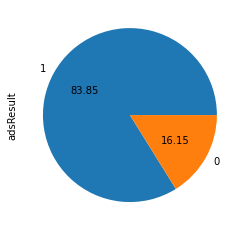

In [31]:
y.value_counts().plot.pie(autopct='%.2f')

Unfortunaly our df is not balance respect on out rows 
Havin 3 time or more rows being noads
Furtunaly we can use some strategys with the use of imbalanced-lear
> `pip install -U imbalanced-learn`


We have 2 main options:
- Over-sampling  
- Under-sampling

In this case we'll use the 2nd one.

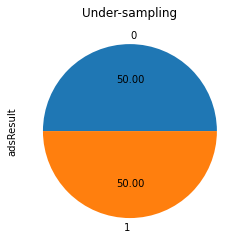

In [32]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy = 1)

# Now we will repalce x and y with x resample and y resample
X_res, y_res = rus.fit_resample(x,y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

# Evolutionary Algorithm

In [33]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
# Decision tree
def get_model(trainX, trainY):
    x_train, x_test, y_train, y_test = train_test_split(trainX, trainY, test_size = 0.30 )
    mymodel= DecisionTreeClassifier()
    mymodel = mymodel.fit(x_train,y_train)
    #Predict the response for test dataset
    y_prediction = mymodel.predict(x_test)
    return accuracy_score(y_test, y_prediction) 
get_model(X_res,y_res)

0.9301310043668122

In [34]:
# Individual initialization
def createIndividual(n): 
    return np.random.randint(0 , 2, n)
p = createIndividual(10)
print(p)

[0 1 0 0 1 0 1 0 0 0]


In [35]:
# Crossover operator
def combine(parentA, parentB, cRate):
  if (random.random() <= cRate):
    cPoint = np.random.randint(1, len(parentA))
    #print(cPoint)
    offspringA = np.append(parentA[0:cPoint], parentB[cPoint:])
    offspringB = np.append(parentB[0:cPoint], parentA[cPoint:])
  else:
    offspringA = np.copy(parentA)
    offspringB = np.copy(parentB)
  return offspringA, offspringB

p1 = createIndividual(10)
p2 = createIndividual(10)
print(p1)
print(p2)
o1, o2 = combine(p1, p2, 1.0)
print(o1)
print(o2)

[0 1 1 0 1 1 1 1 1 1]
[0 0 0 0 1 1 1 1 1 1]
[0 1 1 0 1 1 1 1 1 1]
[0 0 0 0 1 1 1 1 1 1]


In [36]:
# Mutation operator
def mutate(individual, mRate):
  for i in range(len(individual)):
    if (random.random() <= mRate):
      individual[i] = not(individual[i])
  return individual

p1 = createIndividual(10)
print(p1)
mutate(p1, 0.10)
print(p1)

[1 0 1 0 1 0 0 0 0 1]
[1 0 1 0 0 0 0 0 0 1]


In [37]:
def get_data(myVector, columns, calsificationVariable):
    global myFeatures
    myFeatures = [columns[i] for i in range(len(myVector)) if myVector[i] == 1]
    # Count features
    global myCounter
    myCounter = np.add(myVector,myCounter)
    # Testing    
    global newx
    newx = X_res[myFeatures]
    newy= calsificationVariable
    return get_model(newx,newy)
a = get_data(createIndividual(len(features)), features, y_res)
print(a)


0.9170305676855895


In [38]:
# Evaluation function
def evaluate(individual):
  return get_data(individual, features, y_res)

In [39]:
# Tournament selection
def select(population, evaluation, tSize):
  winner = np.random.randint(0, len(population))
  for i in range(tSize - 1):
    rival = np.random.randint(0, len(population))
    if (evaluation[rival] > evaluation[winner]):
      winner = rival
  return population[winner]

In [40]:
# Genetic algorithm
def geneticAlgorithm(n, pSize, gens, cRate, mRate, showGraph):
      # Creates the initial population
      population = [None] * pSize
      evaluation = [None] * pSize
      for i in range(pSize):
        population[i] = createIndividual(n)
        evaluation[i] = evaluate(population[i])
      # Keeps a record of the best individual found so far
      index = 0;
      for i in range(1, pSize):
        if (evaluation[i] > evaluation[index]):
          index = i;
      bestIndividual = population[index]
      bestEvaluation = evaluation[index]
      # Keeps the information for plotting the performance of the algorithm
      best = [0] * gens
      avg = [0] * gens
      # Runs the evolutionary process
      for i in range(gens):
        k = 0
        newPopulation = [None] * pSize
        # Crossover
        for j in range(pSize // 2):
          parentA = select(population, evaluation, 3)
          parentB = select(population, evaluation, 3)
          offspring1, offspring2 = combine(parentA, parentB, cRate)
          newPopulation[k] = offspring1
          newPopulation[k + 1] = offspring2
          k = k + 2
        population = newPopulation
        # Mutation
        for j in range(pSize):
          population[j] = mutate(population[j], mRate)
          evaluation[j] = evaluate(population[j])
          # Keeps a record of the best individual found so far
          if (evaluation[j] > bestEvaluation):
            bestEvaluation = evaluation[j]
            bestIndividual = population[j]
          best[i] = bestEvaluation
          avg[i] = np.average(evaluation)
      if showGraph:
          matplotlib.pyplot.plot(range(gens), best, label = "Best")
          matplotlib.pyplot.plot(range(gens), avg, label = "Average")
          matplotlib.pyplot.legend()
          matplotlib.pyplot.title("GA Run")
          matplotlib.pyplot.show()
      # Returns the best individual found so far
      return bestIndividual, bestEvaluation   

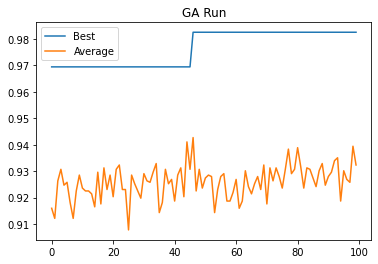

In [41]:
bestIndividual, bestEvaluation = geneticAlgorithm(len(features), 8, 100, 1, 0.01, True)

In [42]:
print(bestIndividual, bestEvaluation)


[1 1 0 ... 0 1 0] 0.982532751091703


Addicionaly to see the columns used we could use:

>`x.columns[np.where(bestIndividual)]`

Or

>`bestFeatures = [features[i] for i in range(len(bestIndividual)) if bestIndividual[i] == 1]`


## Restults

In [43]:
totalAfterGA = sum(bestIndividual)
totalFeatures = len(features)
fraction = totalAfterGA/len(features)
print("At the end from {} features, we end up using {} \nHaving a reduction of {} and ending up with a presition of {}".format(totalFeatures,totalAfterGA,fraction, bestEvaluation))

At the end from 1558 features, we end up using 769 
Having a reduction of 0.49358151476251605 and ending up with a presition of 0.982532751091703


In [44]:
results = []
for times in range(30):
    bestIndividual, bestEvaluation = geneticAlgorithm(len(features), 8, 100, 1, 0.01, False)
    results.append(bestEvaluation)

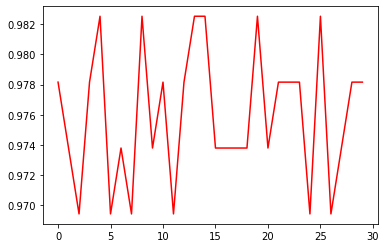

In [45]:
x_results = np.array(results)
y_axis = np.array([_ for _ in range(30)])
plt.plot(y_axis, x_results, color="red")
plt.show()

In [46]:
df_results = pd.DataFrame(results)
df_results.describe()

,0
count,30.000000
mean,0.975983
std,0.004551
min,0.969432
25%,0.973799
50%,0.975983
75%,0.978166
max,0.982533


In [47]:
dict_of_times = {features[ft]: myCounter[ft] for ft in range(len(features)) }
conterOfFeatures = pd.DataFrame.from_dict(dict_of_times, orient='index', columns = ['Times']
).reset_index()

In [48]:
conterOfFeatures

,index,Times
0,height,20419
1,width,11300
2,aratio,19060
3,local,10312
4,url*images+buttons,14493
...,...,...
1553,caption*bytes,12658
1554,caption*here,11444
1555,caption*click,10523
1556,caption*for,13415


In [65]:
conterOfFeatures.max()

index    width
Times    20419
dtype: object

In [66]:
conterOfFeatures.min()

index    alt*a+tour
Times          7747
dtype: object